In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
library(dbplyr)
library(DBI)
library(RPostgres)
library(lubridate)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# Algerian Forest Fires and Weather
## Background and Introduction:
As our climate changes, it is important to understand the conditions which can lead to forest fire ignition. Due to increasing temperatures, summer temperatures have been increasing, resulting in dryer heat (lower humidity), dryer forests, which can lead to forest fires. Rising temperatures result in inequality of temperature between the sky and the earth, leading to further likelihood of lightning--along with fire-related human activites, igniting forces are sure to lead to forest fires. ([Source](https://climateatlas.ca/forest-fires-and-climate-change#:~:text=Dry%20heat%20helps%20create%20more,rising%20temperature%20of%20the%20Arctic.))


## Q: What weather conditions result in a forest fire in Algerian Forest Areas?
## Dataset:
"The Algerian Forest Fires Dataset" ([Source for data](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++))  provides information on forest fires in two areas: Sidi-Bel Abbas and Bejaia regions. The data was taken from June 2012- September 2012, and contains information on the following data:

1. Date: Day, month, year
*Weather data*

2. Temp: temperature noon (Celsius): 22 to 42
3. RH: Relative Humidity (%): 21 to 90
4. Ws: Wind speed (km/h): 6 to 29
5. Rain: total day (mm): 0 to 16.8

*FWI Components*

6. Fine Fuel Moisture Code (FFMC) index: 28.6 to 92.5
7. Duff Moisture Code (DMC) index: 1.1 to 65.9
8. Drought Code (DC) index: 7 to 220.4
9. Initial Spread Index (ISI): 0 to 18.5
10. Buildup Index (BUI): 1.1 to 68
11. Fire Weather Index (FWI): 0 to 31.1

*Classes*

12. Fire or Not Fire

Fire Weather Index (FWI) is a general measure used to predict the intensity of a potential fire in the area, & takes into account each component when calculating this ([Source](10.1007/978-3-030-36674-2_37)) 

## Methods
For our analysis, we will be looking at weather data observations of Temperature and FWI. We're interested in the contribution of the weather in forest fire ignition, and how this might correlate with FWI.

To achieve this, we will be performing a classification using the Algerian forest fires dataset. First, we must tidy our data. To do this, we load the data into Jupyter and specify which columns we want as integers, doubles, or characters. Secondly, we will work to merge the two tables for each region that are in our dataset; we will split the dataset into two tables and save them to the objects 'bejaia_region' and 'sidi_bel_region', which correspond to which region the data was collected from. Then, we will combine both tables into one, using 'rbind' and saving that to an object called 'forest_fire_data'. Next, we will select which variables we wish to keep in our data set (Temperature, FWI, Classes) and use the 'mutate' function to use the Classes column as a factor. We will create an inital plot of the training data, colored by class to see what the training data looks like (Figure 1). We will perform a summary of the training dataset (Table 1) which produces the averages for each predictor in each class.

Next, we begin creating our recipe. First, we will split our data in to training (75%) and test (25%) sets. Using Classes as the target variable and temperature, and FWI as predictors, we create our recipe with our training data.

We will determine which k-value is the best by using a grid v-fold and setting our neighbours to tune in our "knn_spec". In our recipes we will ensure to scale all predictors involved in order to ensure the equal weighting of each predictor. We will create a tibble of neighbours, and create a workflow which includes our recipe and tuning spec. We will then collect the metrics from this workflow.

We then will filter these metrics for accuracy, and plot the accuracy level and k values to determine which has the highest level of accuracy (Figure 2). By plotting these values, we will be able to visualize the best accuracy k-value.

After plotting these values, we will test the accuracy of our optimized k-value. We will do this by creating a new spec with the k value, and use this in a new workflow with the training data. 
We will then use this new workflow to predict on the test data, combine the columns, and collect the new metrics for this data to determine what the accuracy for these predictions are. 
We will then create a confusion matrix (Table 2) to look at the numbers of correct and incorrect predictions are.

After, we will create a new plot of our predictors and new predictions on class with our test data (Figure 3).

Planned Visualizations:
- a scattergraph with temperature on the y-axis and then FWI on the x-axis, and coloured by Class. This will allow us to see any correlation with the two predictors and which class is which. We will be able to see the thresholds for FWI and Temperature and where they may lie.

Warning message:
“18 parsing failures.
row   col   expected                        actual                                                                                                       file
123 day   an integer Sidi-Bel Abbes Region Dataset 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
123 NA    14 columns 1 columns                     'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
124 day   an integer day                           'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
124 month an integer month                         'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
124 year  an integer year                          'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
... ..... ...

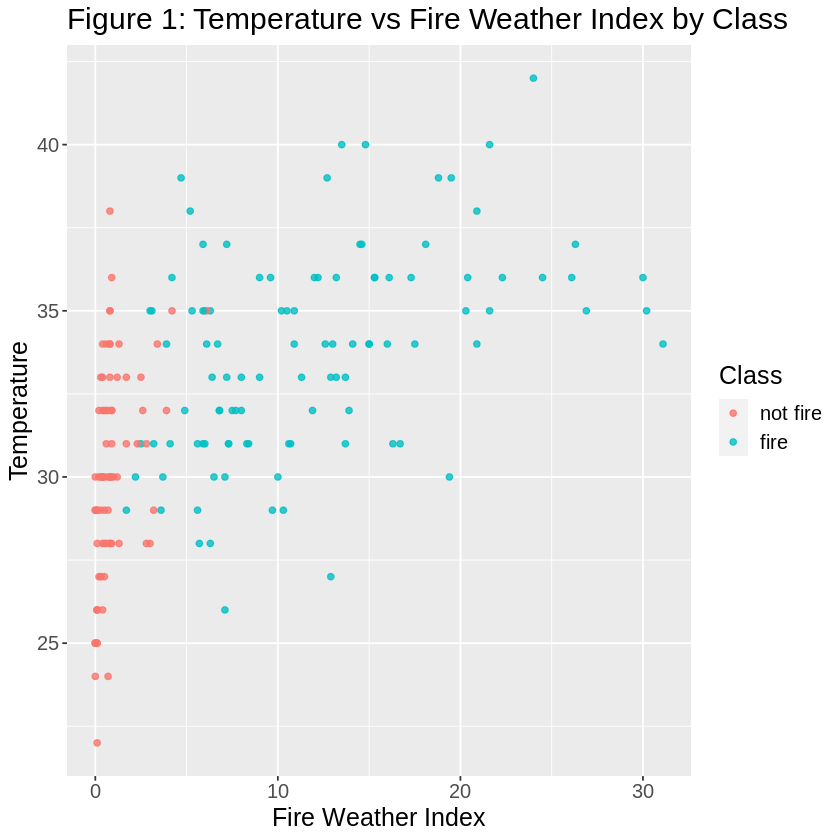

In [7]:
forest_fires_untidy <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", 
                                skip = 1, col_names = TRUE, col_types = cols_only(
                                      day = col_integer(),
                                      month = col_integer(),
                                      year = col_integer(),
                                      Temperature = col_double(),
                                      RH = col_double(),
                                      Ws = col_double(),
                                      Rain = col_double(),
                                      FFMC = col_double(),
                                      DMC = col_double(),
                                      DC = col_double(),
                                      ISI = col_double(),
                                      BUI = col_double(),
                                      FWI = col_double(),
                                      Classes = col_character()))  
  
bejaia_region <- forest_fires_untidy %>%
    slice(1:122) %>%
    mutate(region = "bejaia")

sidi_bel_region <- forest_fires_untidy %>%
    slice(125:246) %>%
    mutate(region = "sidi bel abbes")

forest_fire_data <- rbind(bejaia_region, sidi_bel_region) 

fire_data <- forest_fire_data %>%
     filter(!is.na(Classes)) %>%
     select(Temperature, FWI, Classes) %>%
     mutate(Classes = as_factor(Classes))

set.seed(1)
fire_split <- initial_split(fire_data, prop = 0.75, strata = Classes)
fire_train <- training(fire_split)
fire_test <- testing(fire_split)

# plot with training data
fire_test_plot <- fire_train %>%
    ggplot(aes(x = FWI, y = Temperature, color = Classes))+
    geom_point(alpha = 0.8)+
    scale_fill_distiller(palette = "YlOrRd") +
    labs(x = "Fire Weather Index", y = "Temperature", color = "Class", title = "Figure 1: Temperature vs Fire Weather Index by Class")+
    theme(text = element_text(size = 15))

fire_test_plot

In [3]:
summary_table <- fire_train %>%
        group_by(Classes) %>%
        summarize(n = n(),
        average_temp = mean(Temperature),
        average_FWI = mean(FWI))
print("Table 1")
summary_table

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table 1"


Classes,n,average_temp,average_FWI
<fct>,<int>,<dbl>,<dbl>
not fire,80,29.97500,0.92375
fire,103,33.70874,11.84854


This table has two rows which give statistics about "fire" and "not fire" conditions. We observe that the average temperature and FWI for a "not fire" condition are 29.9 Celsius dgeress and 0.92, and the average temperature and FWI for a "fire" condition are 33.7 Celsius dgeress and 11.8.

Now, we will find the optimum K value by performing a grid v-fold and setting neighbours to tune in our 'knn_spec'.

[1] 9

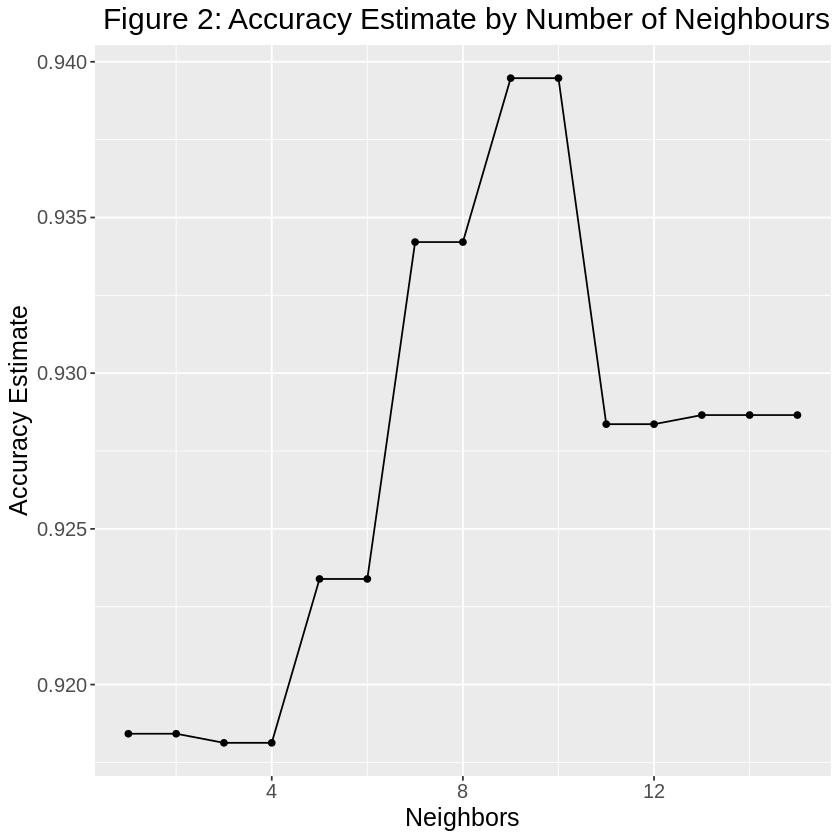

In [8]:
set.seed(1)
fire_vfold <- vfold_cv(fire_train, v = 10,strata = Classes)

best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

fire_recipe <- recipe(Classes ~ Temperature + FWI, data = fire_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1)) 

knn_results <- workflow() %>%
    add_recipe(fire_recipe) %>%
    add_model(best_knn_spec) %>%
    tune_grid(resamples = fire_vfold, grid = k_vals) %>%
    collect_metrics()

accuracies <- knn_results %>%
    filter(.metric == "accuracy")

accuracy_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs (x = "Neighbors", y = "Accuracy Estimate", title = " Figure 2: Accuracy Estimate by Number of Neighbours") +
    theme(text = element_text(size = 15))
accuracy_plot

best_neighbor <- accuracies %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    pull(neighbors)

best_neighbor

Figure 2 shows that when k value is either 9 or 10, it gives a best accuracy rate around 0.94. We will use k = 9 as our best neighbors value for the further anaylysis on the regression model.

In [5]:
set.seed(1)
# testing accuracy
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_neighbor) %>%
    set_engine("kknn") %>%
    set_mode("classification")

knn_best_fit <- workflow() %>%
    add_recipe(fire_recipe) %>%
    add_model(knn_best_spec) %>%
    fit(fire_train)

fire_best_test_predictions <- predict(knn_best_fit, fire_test) %>%
    bind_cols(fire_test)

fire_best_accuracy <- fire_best_test_predictions %>%
        metrics(truth = Classes, estimate = .pred_class) %>%
        filter(.metric == "accuracy") %>%
        select(.estimate) %>%
        as.numeric()
fire_best_accuracy

[1] 0.8666667

After we apply our regression model with k = 9 on the testing data, we observe that the accuracy rate is about 0.8667 which is not bad.

Then, we use the predicted data from the testing data to plot a scattergraph which shows how temperature and FWI contribute the occurence of the forest fire.

[1] "Table 2"


          Truth
Prediction not fire fire
  not fire       22    4
  fire            4   30

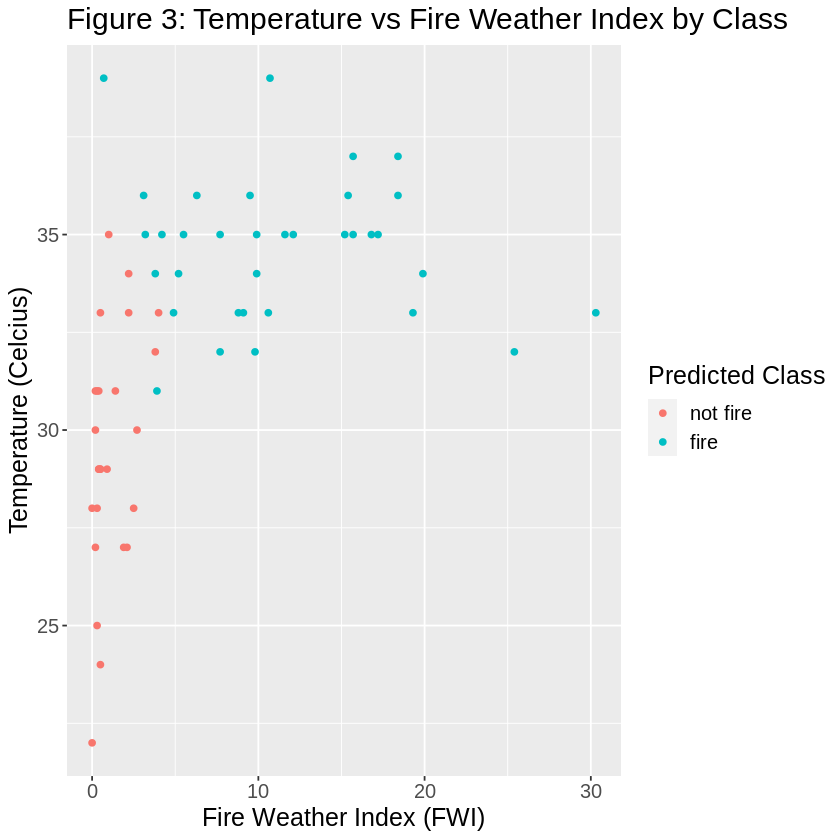

In [10]:
# confusion matrix
fire_mat <- fire_best_test_predictions %>%
    conf_mat(truth = Classes, estimate = .pred_class)
print("Table 2")
fire_mat

# plot of test predictions
fire_test_plot <- fire_best_test_predictions %>%
    ggplot(aes(x = FWI, y = Temperature, )) +
    geom_point(aes(color = .pred_class)) +
    xlab("Fire Weather Index (FWI)") +
    ylab("Temperature (Celcius)") +
    labs(title = "Figure 3: Temperature vs Fire Weather Index by Class", color = "Predicted Class")+
    theme(text = element_text(size = 15))
fire_test_plot

## Discussion

Overall, we found that FWI is a more significant predictor for whether or not there will be a fire. Fires are likely to be found where the FWI is over 3.5, and Temperatures over 30C also contribute. We had thought that Temperature would be a bigger predictor in whether or not there would be a fire, yet we found that so long as the FWI was low enough, there was still less likelihood of a fire, even in temperatures up to 30C.

Our findings are significant as they will help predict environmental factors which will cause forest fires, therefore tracking days of potential danger of fires, allowing us to act accordingly. 

Some future questions are:
- What are the potential reasons that can cause FWI to increase? 
- How do the factor levels that contribute to forest fires in Algeria compare with the same factor levels elsewhere?
- How might we combat these weather changes in to prevent forest fires?